# **Background Generation**

## **Functions**

In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/src")

from morphan import MorphAn

import skimage.io as io
import numpy as np
import multiprocessing as mp

## **Determine Parameters**
---
* Edit "image_path" variable with a path to an image that you want to evaluate
* Edit "target_slice" variable with a row index that you want to evaluate

In [2]:
image_path = os.path.join(module_path,'src','example','images_raw','microdish_ctx_20x_DIV7_plateA_N2_1.tif')
target_slice = 658

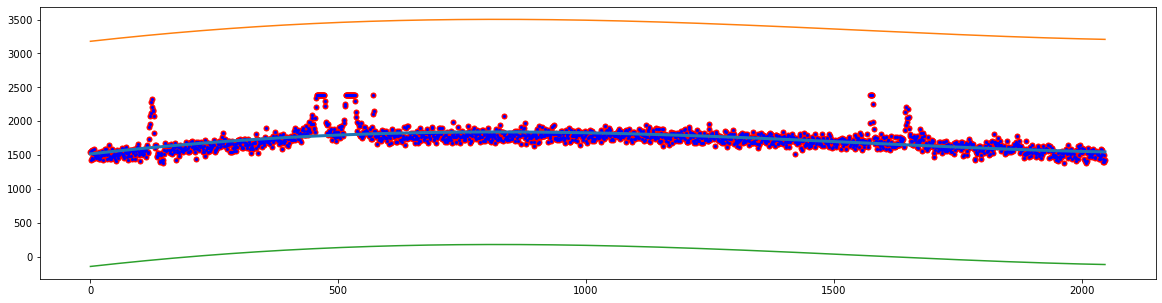

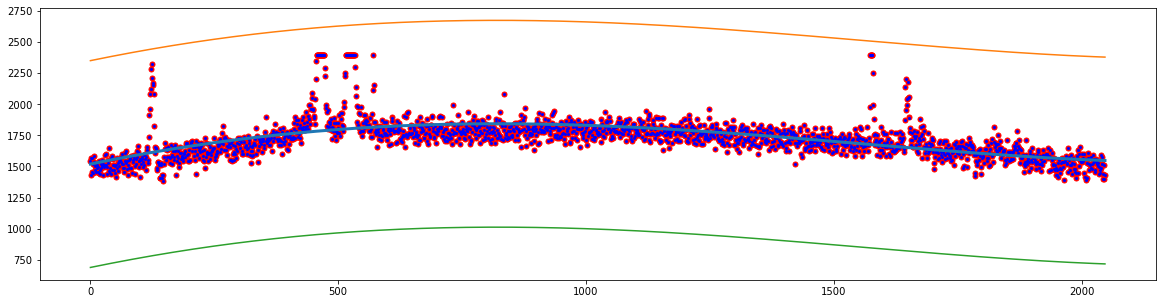

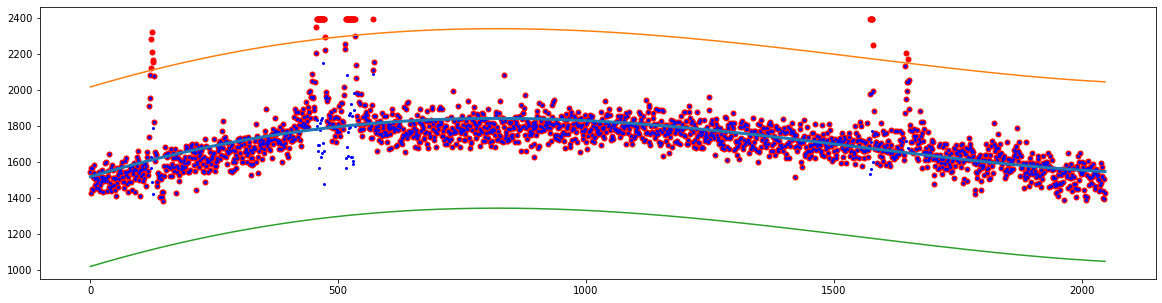

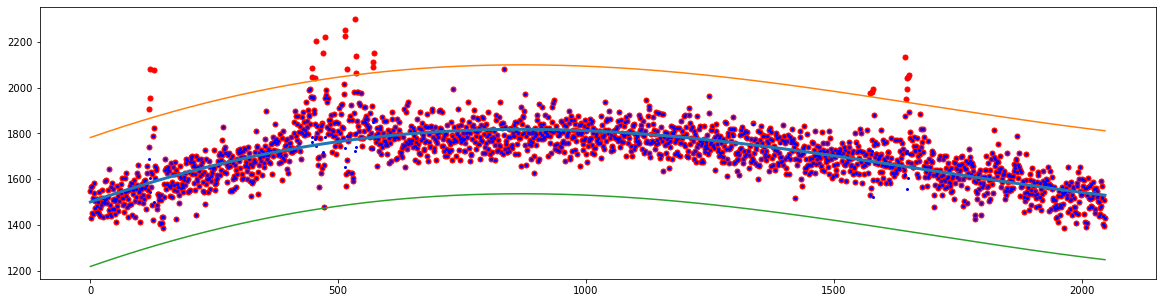

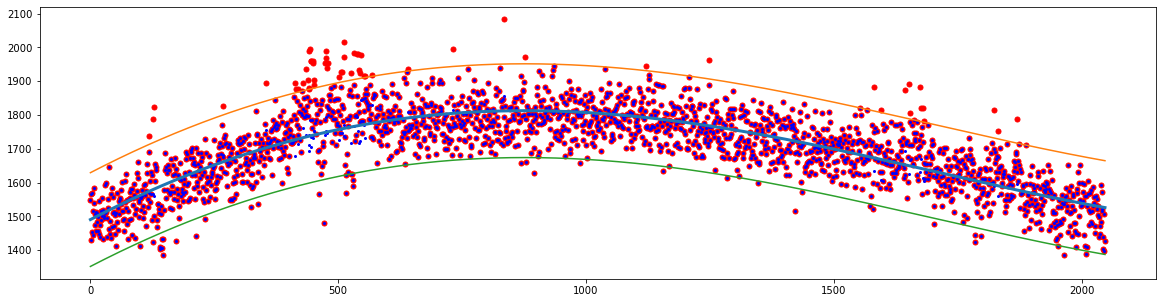

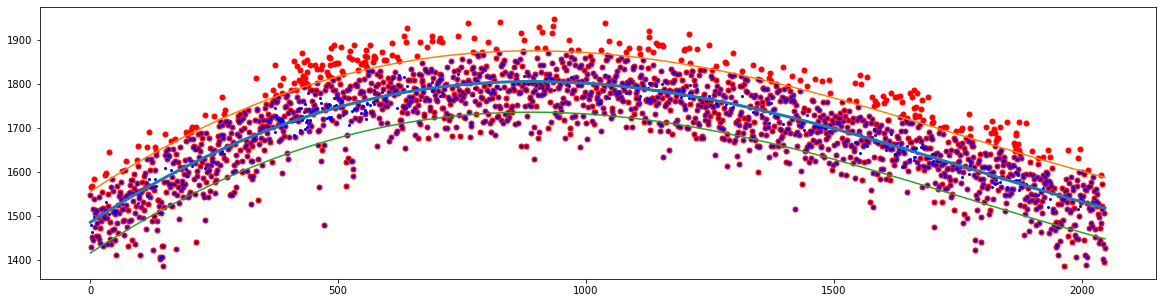

In [3]:
MA = MorphAn()

image = io.imread(image_path)
xDim = np.arange(image.shape[0])
image_slice = image[target_slice]
display = True

image_slice = MA.background_processor(xDim,image_slice,   10   , True,True,display)
image_slice = MA.background_processor(xDim,image_slice,   5   , False,False,display)
image_slice = MA.background_processor(xDim,image_slice,   3   , False,False,display)
image_slice = MA.background_processor(xDim,image_slice,   2   , False,False,display)
image_slice = MA.background_processor(xDim,image_slice,   1   , False,False,display)
image_slice = MA.background_processor(xDim,image_slice,   .5   , False,False,display)

## **Generate Backgrounds**
---
* Edit "output_path" variable with a desired path to save the processed image
* Edit "threshold_parameters" variable with the desired parameters
* Edit "apply_lower_threshold" variable with the desired boolean values
* Edit "precut_bool" variable with the desired boolean values
* Edit "num_process" variable with the number of CPU processes that you want to use to perform multiprocessing
* Edit "image_path" variable with a path to an image that you want to evaluate

In [ ]:
output_path = os.path.join(module_path,'src','example','images_background','microdish_ctx_20x_DIV7_plateA_N2_1.tif')
threshold_parameters = [10,5,3,2,1,.5]
apply_lower_threshold = [True,False,False,False,False,False]
precut_bool = [True,False,False,False,False,False]
num_process = 20
image_path = os.path.join(module_path,'src','example','images_raw','microdish_ctx_20x_DIV7_plateA_N2_1.tif')

In [ ]:
MA = MorphAn()
image = io.imread(image_path)
xDim = np.arange(image.shape[0])

for thres_param, low_thres, precut in zip(threshold_parameters,apply_lower_threshold,precut_bool):
        arguments = [(xDim,i,thres_param,low_thres,precut) for i in image]
        with mp.Pool(num_process) as p:
            result = p.map(MA.bg_wrapper,arguments)

image_background = np.vstack(result)
io.imsave(output_path,image_background)

## **[Bulk Process] Generate Backgrounds**
---
* Edit "images_dir" variable with a path to a folder with raw images to process
* Edit "output_dir" variable with a path to a folder to save the generated background images
* Edit "threshold_parameters" variable with the desired parameters
* Edit "apply_lower_threshold" variable with the desired boolean values
* Edit "precut_bool" variable with the desired boolean values
* Edit "num_process" variable with the number of CPU processes that you want to use to perform multiprocessing


In [4]:
MA = MorphAn()

images_dir = os.path.join(module_path,'src','example','images_raw')
output_dir = MA.check_directory(module_path,'src/example/images_background')
threshold_parameters = [10,5,3,2,1,.5]
apply_lower_threshold = [True,False,False,False,False,False]
precut_bool = [True,False,False,False,False,False]
num_process = 20

In [5]:
for image_file in os.listdir(images_dir):
    print(image_file)
    image_path = os.path.join(images_dir,image_file)
    output_path = os.path.join(output_dir,image_file)
    image = io.imread(image_path)
    xDim = np.arange(image.shape[0])
    
    for thres_param, low_thres, precut in zip(threshold_parameters,apply_lower_threshold,precut_bool):
            arguments = [(xDim,i,thres_param,low_thres,precut) for i in image]
            with mp.Pool(num_process) as p:
                result = p.map(MA.bg_wrapper,arguments)

    image_background = np.vstack(result)
    io.imsave(output_path,image_background)

microdish_ctx_20x_DIV7_plateA_P3_1.tif
microdish_ctx_20x_DIV7_plateA_O1_1.tif


<ipython-input-5-63aaae489ffe>:14: UserWarning: /data/hyun/Analysis/scripts/MorphAn/src/example/images_background/microdish_ctx_20x_DIV7_plateA_P3_1.tif is a low contrast image
  io.imsave(output_path,image_background)


microdish_ctx_20x_DIV7_plateA_N2_1.tif


<ipython-input-5-63aaae489ffe>:14: UserWarning: /data/hyun/Analysis/scripts/MorphAn/src/example/images_background/microdish_ctx_20x_DIV7_plateA_O1_1.tif is a low contrast image
  io.imsave(output_path,image_background)
<ipython-input-5-63aaae489ffe>:14: UserWarning: /data/hyun/Analysis/scripts/MorphAn/src/example/images_background/microdish_ctx_20x_DIV7_plateA_N2_1.tif is a low contrast image
  io.imsave(output_path,image_background)
